In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [98]:
from sklearn.datasets import load_boston
housing_data = load_boston()
#The dataset is a dictionary and now let's see its keys
print(housing_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [99]:
# Let's check description of the dataset
#print (housing_data["DESCR"])

In [100]:
#Converting to Data Frame using Pandas
boston = pd.DataFrame(housing_data.data)
#Assigning feature-names to colums of data frame
boston.columns = housing_data.feature_names
#boston.head()

In [101]:
#Adding the target column Price to the data frame
boston['Price'] = housing_data.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [102]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [103]:
# Descriptive or Summary Statistic of the numeric columns
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Let's create some plots and visualize the dataset**

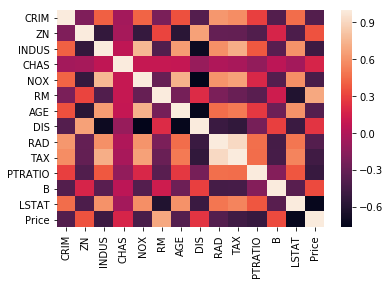

In [104]:
# Correlation between Different features
sns.heatmap(boston.corr())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


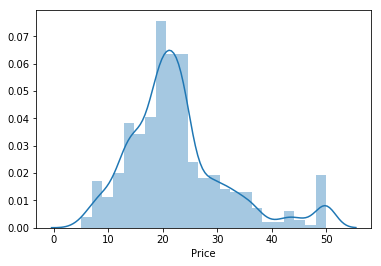

In [105]:
# Distributing of Price Column
sns.distplot(boston['Price'])

### Training a Linear Regression Model

In [106]:
# Creating Predictor variable 'X' and Target Variable 'y'

# X contains all the features except for the target value Price
X = boston.drop('Price', axis = 1)
y = boston['Price']

In [107]:
#Now let's split the data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)

# X_train contains 70% of total dataset
print(X_train.shape)
# X_test contains 30% of total dataset
print(X_test.shape)

(354, 13)
(152, 13)


In [108]:
lr = LinearRegression()

In [109]:
#Train/fit the model to training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
#Let's evaluate the model by checking out it's intercept and coefficients.**
# print the intercept
print(lr.intercept_)

#Coefficients
#coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
#coeff_df

25.469528442762975


In [111]:
#Interpreting the coefficients:
#Holding all other features fixed, a 1 unit increase in RM(average number of rooms per dwelling)
#is associated with an *increase of $5.032224 *. This can be extended for any feature and coefficient.

**Predictions from Model**

In [112]:
y_pred = lr.predict(X_test)

Text(0,0.5,'Predicted prices')

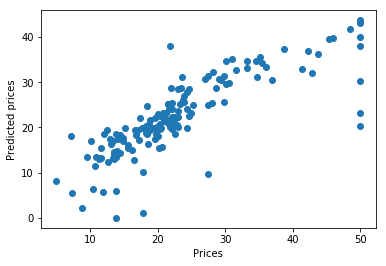

In [113]:
plt.scatter(y_test,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")

In [114]:
#Regression evaluation metrics using sklearn package
#from sklearn import metrics
#print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_pred))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Regression evaluation metrics:

### Mean Square Error & Mean Absolute Error:
![MSE MAE](https://econbrowser.com/wp-content/uploads/2019/07/msemae.png)


In [115]:
import numpy as np 
mae=np.average(np.abs(y_test-y_pred))
print("Mean Absolute Error: ",mae)

Mean Absolute Error:  3.6789775344994293


In [116]:
mse=np.average((y_test-y_pred)**2)
print("Mean Square Error: ",mse)

Mean Square Error:  33.868033996670036


### R squared:
![R square](https://miro.medium.com/max/1432/1*WCaWmRreXCQxLez4yYOy5w.png)

In [122]:
SSres=np.sum((y_test-y_pred)**2)
SStot=np.sum((y_test-np.mean(y_test))**2)
R2=1-SSres/SStot
print("R²: ",R2)

R²:  0.6685538790447983


### R squared adjusted:
![Radjusted](https://static.packt-cdn.com/products/9781788295758/graphics/B07777_01_F12.jpg)

In [118]:
adj_R2=1-(1-R2)*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1)
print("Adjusted R²:",adj_R2)

Adjusted R²: 0.6373306937374242


In [119]:
X_train.shape[1]

13

### Root Mean Squared Error:
![RMSE](https://community.qlik.com/legacyfs/online/128958_2016-06-23%2013_45_36-Root%20Mean%20Squared%20Error%20_%20Kaggle.png)



In [120]:
rmse=np.sqrt(np.average((y_test-y_pred)**2))

In [121]:
print("Root Mean Squared Error: ",rmse)

Root Mean Squared Error:  5.819624901715748
